# The diffusion equation

The diffusion equation describes any stuff that diffuses through a medium, in which the diffusion process is inherently a random walk of the individual stuff. For example, heat diffuses in this way, so does a ink fluid when dropped into still water:

\begin{align}
    \frac{\partial \rho}{\partial t} = \alpha \frac{\partial^2 \rho}{\partial x^2}
\end{align}

where $\rho$ is the density of a substance and $\alpha$ is the diffusion coefficient. In order to simulate this equation we must pass from a continuous equation to a discrete equation, since continuous variables is not a computational reality. Thus, our simulation is taken in timesteps of size $\Delta t$, where the step in time must not be larger than

\begin{align}
    \Delta t \leq \frac{\left( \Delta x \right)^2}{2 \alpha}
\end{align}

being $\Delta x$ the step in space, that is, the minimum unit of division of our space (we are working on 1 dimensional, so dividing our space in spatial steps is easier).

When working in discrete time and space, the differential operators $\partial$ become only spatial or temporal differences ($\partial t \rightarrow \Delta t$, for example). This way, the left hand side of the heat diffusion equation is written as

\begin{align}
    \frac{\Delta \rho}{\Delta t}
\end{align}

since $\alpha$ is a constant, it does not change when we move from continuous systems to discrete systems. Ok, now to the second derivative term... remember that $\partial^2/\partial x^2$ is not a derivative squared, is the application of a derivative on top of a derivative, formaly it means

\begin{align}
    & \frac{\partial^2}{\partial x^2} = \frac{\partial}{\partial x} \left( \frac{\partial}{\partial x} \right) \\
    & \frac{\partial^2}{\partial x^2} \neq \left( \frac{\partial}{\partial x} \right)^2
\end{align}

In reality, we are computing the rate of change of the spatial change. So the second derivative is written

\begin{align}
    \frac{\partial^2 \rho}{\partial x^2} \rightarrow \frac{\rho_{i+1} - 2\rho_{i} + \rho_{i-1}}{\Delta x^2}
\end{align}

Thus, the final equation in discrete time and space is

\begin{align}
    \frac{\rho_i^{t+1} - \rho_i^t}{\Delta t} = \alpha \frac{\rho_{i+1}^t - 2\rho_{i}^t + \rho_{i-1}^t}{\Delta x^2} = \alpha \left[ -\frac{\left( \rho_i^t - \rho_{i-1}^t \right)}{\Delta x^2} - \frac{\left( \rho_{i+1}^t - \rho_{i}^t \right)}{\Delta x^2} \right]
\end{align}

We then compute the density $\rho_{i}^{t+1}$ simply by

\begin{align}
    \rho_i^{t+1} = \rho_i^t + \alpha \Delta t \left[ -\frac{\left( \rho_i^t - \rho_{i-1}^t \right)}{\Delta x^2} - \frac{\left( \rho_{i+1}^t - \rho_{i}^t \right)}{\Delta x^2} \right]
\end{align}

Let's simulate this using the following libraries ```numpy```, ```scipy``` and ```matplotlib```. We can do it using only ```numpy``` actually, ```matplotlib``` will be used only to plot the result and ```scipy``` only to write our initial condition. We will consider as a initial condition, that is the value of $\rho_i$ when $t=0$, $\rho_i^0 = \mathrm{Gaussian}(x_i)$. We will be starting with a normal distribution of density, and we will see what happens to this density distribution as time passes. The ```scipy``` library will be used to define this, altough we could define it using ```numpy``` as well, I just want to speed things up.

I will be also importing the libaries ```warnings```, ```seaborn``` and ```tqdm```. But they are not used to solve the equation, they are just to ignore any warning, get beautiful color palettes for the plots and print the progress bar of the simulation, respectively.

In [2]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import scipy.stats as st

Our first step now is to before solving it, defining our space and time. That is, we need to define the size of our space and the number of divisions. I will define it going from $x_{\min}$ to $x_{\max}$, divided in $n$ steps.

I will also be defining the mean and standard deviation of the gaussian curve for the initial condition, and the value of the $\alpha$ constant.

Finally, I define the final time $t_{\mathrm{final}}$ for the simulation and the time steps as being $\mathrm{d}t = \mathrm{d}x^2/8\alpha$. Why 8? Just because $1/8$ is smaller than $1/2$, so we will be satisfying the condition

\begin{align}
    \Delta t \leq \frac{\left( \Delta x \right)^2}{2 \alpha}
\end{align}

and indeed

\begin{align}
    \frac{\left( \Delta x \right)^2}{8 \alpha} < \frac{\left( \Delta x \right)^2}{2 \alpha}
\end{align}

In [42]:
x_min = -5
x_max = 5
n = 100
center = 0
sd = 1
T1s = 0.1
T2s = 0.1

dx = (x_max - x_min)/n

alpha = 1e-2
t_final = 180
dt = dx**2 / (8*alpha)

print(f'Time step: {dt:.2f}')
print(f'Spatial step: {dx:.2f}')

Time step: 0.13
Spatial step: 0.10


In [44]:
# Create the space
x = np.linspace(x_min, x_max, n)

# Initial condition
T = st.norm.pdf(x, center, sd)
dTdt = np.empty(n)

# Create time array
t = np.arange(0, t_final, dt)

In [45]:
temps = [T]

In [46]:
# Solving the differential equation
for i in tqdm(range(len(t))):
    for j in range(1,n-1):
        dTdt[j] = alpha*(-(T[j]-T[j-1])/dx**2 + (T[j+1] - T[j])/dx**2)
    dTdt[0] = dTdt[1]#alpha*(-(T[0]-T1s)/dx**2 + (T[1] - T[0])/dx**2)
    dTdt[n-1] = dTdt[n-2]#alpha*(-(T[n-1]-T[n-2])/dx**2 + (T2s - T[n-1])/dx**2)
    T = T + dTdt*dt
    temps.append(T)

100%|██████████| 1440/1440 [00:00<00:00, 8697.69it/s]


In [47]:
sns.color_palette('viridis', 10)

[(0.283072, 0.130895, 0.449241),
 (0.262138, 0.242286, 0.520837),
 (0.220057, 0.343307, 0.549413),
 (0.177423, 0.437527, 0.557565),
 (0.143343, 0.522773, 0.556295),
 (0.119512, 0.607464, 0.540218),
 (0.166383, 0.690856, 0.496502),
 (0.319809, 0.770914, 0.411152),
 (0.525776, 0.833491, 0.288127),
 (0.762373, 0.876424, 0.137064)]

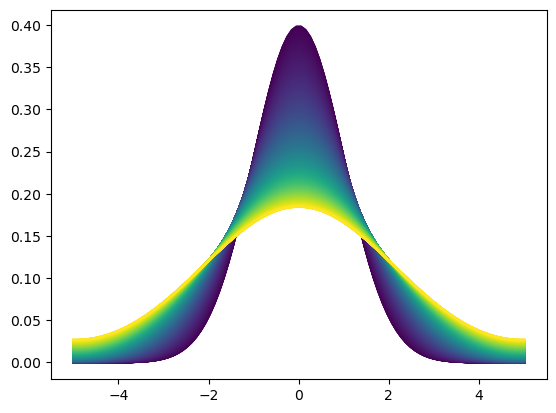

In [48]:
for i in range(len(temps)):
    plt.plot(x, temps[i], color = sns.color_palette('viridis', len(temps))[i])
    
plt.show()

In [49]:
temps = np.array(temps)

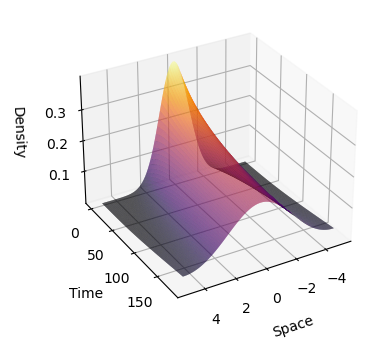

In [77]:
# setup the figure and axes
fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(111, projection='3d')

X, Y = np.meshgrid(x, t)  # `plot_surface` expects `x` and `y` data to be 2D
ax.plot_surface(X, Y, temps[1:], cmap = 'inferno', cstride=1, rstride = 1)

# ax.bar3d(X, T, temos, width, depth, top, shade=True)
# ax.set_title('Shaded')
ax.set_xlabel('Space', labelpad = 8)
ax.set_ylabel('Time', labelpad = 8)
ax.set_zlabel('Density', labelpad = 8)
ax.view_init(elev=30, azim=60)
plt.show()

**Random stuff (ignore it)**

Critical habitat size

\begin{align}
    L_c = \pi \sqrt{\frac{D_b}{r}}
\end{align}

Saturation...

\begin{align}
    \frac{\partial S}{\partial x} \rightarrow \tanh \left( \frac{\partial S}{\partial x} \right)
\end{align}